# Tipos de Faca

# Autor
Nome: Leonardo Fernandes Padre

Matrícula: 200067036

# Objetivo
Desenvolver um modelo com o objetivo de fazer a distinção entre 4 tipos de faca: Butterfly, Ursus, Gut e Karambit.

# Motivação
Conseguir importar modelos de aprendizado de máquina para serem utilizados por outras pessoas através do [Hugging Face](https://huggingface.co/).

# Desenvolvimento
Este modelo foi todo desenvolvido na ferramenta [Google Colab](https://colab.research.google.com), disponível para navegador. Utilizando o [pip](https://pypi.org/project/pip/) como instalador de pacotes.


In [1]:
!pip install -qq fastai
!pip install -qq duckduckgo_search
!pip install -qq fastbook

from fastai.vision.all import *
import duckduckgo_search
from fastbook import *
from fastdownload import download_url

# Criando a Base de Dados

In [2]:
lbs = 'knife-butterfly', 'knife-ursus', 'knife-gut', 'knife-karambit'
path = Path('knifes')

for o in lbs:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images_ddg(o, max_images=100))

In [3]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f'Falhas Removidas: {len(failed)}')

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Falhas Removidas: 6


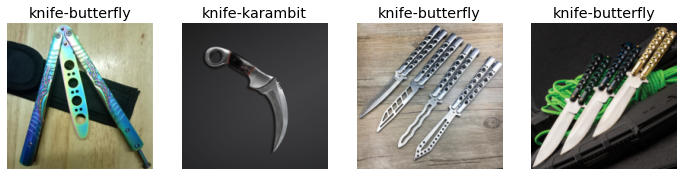

In [4]:
knifes = DataBlock (
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')]
)
dls = knifes.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows = 1)

# Testando Formas de Redimensionamento
Foi deixado como padrão na criação do `DataBlock` o método `squish`, no qual tenta realizar o redimensionamento sem cortar a imagem, respeitando a dimensão colocada (192x192 pixels).

## Pad
Esse método preza por não cortar e modificar a imagem, podendo gerar as "black bars" demonstrada abaixo. O problema dessa forma é a grande quantidade de processamento que será usada em vão, pois o modelo também considerá as black bars.

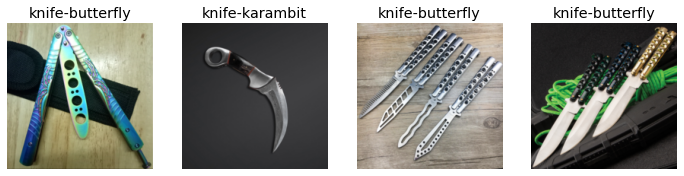

In [5]:
knifes = knifes.new(item_tfms=Resize(192, ResizeMethod.Pad, pad_mode='zeros'))
dls = knifes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

## Random Resized Crop
Método que consiste em realizar cortes em lugares randomicos da imagem, sempre dando preferência ao objeto principal. Utilizado para dar a sensação de menos informação da imagem ao modelo, no intuito de testar se o modelo responderia da mesma forma para todas as imagens.

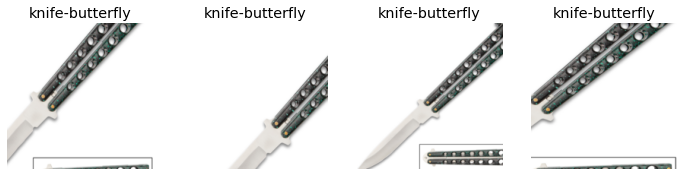

In [6]:
knifes = knifes.new(item_tfms=RandomResizedCrop(192, min_scale=0.3))
dls = knifes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Visando o mesmo intuito da função anterior, a próxima célula de código utiliza uma nova função. O parâmetro `batch_tfms` tem o objetivo de informar o fastai que utilizaremos `aug_transforms` para todo o lote. 

`aug_transforms` é uma técnica com o objetivo de criar variações aleatórias dos dados de entrada de modo que pareçam diferentes sem alterar seu significado. Analisando a saida da próxima célula é possível visualizar seu funcionamento.

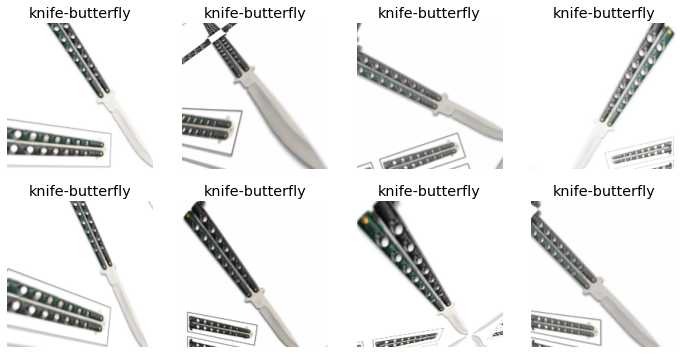

In [7]:
knifes = knifes.new(item_tfms=Resize(192), batch_tfms=aug_transforms(mult=2))
dls = knifes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# Treinando o Modelo

Utilizaremos duas funções explicadas anteriormente para dar maior robustez a nossa base de dados (`RandomResizedCrop` e `aug_transforms`). Por se tratar de uma classificação multi-classe, é necessário maior quantidade de dados para que o modelo performe melhor.

In [8]:
knifes = knifes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = knifes.dataloaders(path)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.796829,0.759287,0.275168,02:12


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,0.601901,0.402879,0.120805,02:54
1,0.466339,0.180540,0.067114,03:02
2,0.350735,0.203870,0.067114,03:00
3,0.270640,0.174110,0.046980,02:51
4,0.215118,0.155903,0.040268,02:56
5,0.185517,0.147150,0.040268,03:02


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

## Matriz de Confusão

Após treinamento, podemos visualizar de uma forma melhor os erros que o modelo comete atravez da matriz de confusão. Nela é demonstrada o que é de fato e o que o modelo apontou. Sua diagonal demonstra os casos corretos.

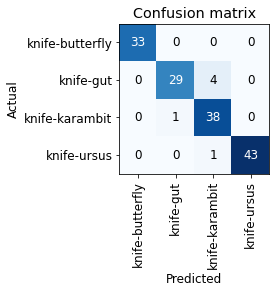

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Na intenção de ilustrar ainda mais os erros, a função `plot_top_losses()` mostras as imagens em que o modelo errou e as probabilidades atribuidas.

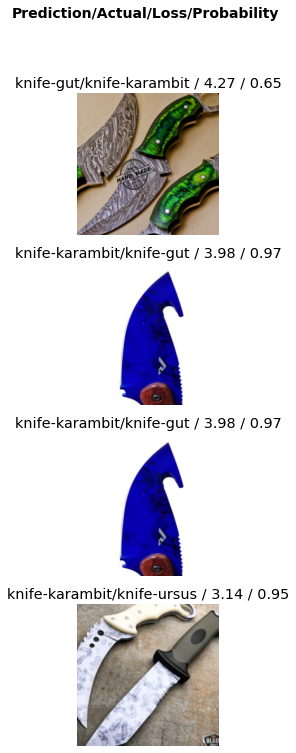

In [11]:
interp.plot_top_losses(4, nrows = 4)

A função `ImageClassifierCleaner` vem como uma forma de auxiliar manualmente a limpeza dos dados indesejados, ela mostra as imagens e da a opção de deletar ou manter.

In [12]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Após essa curadoria manual, a próxima célula de código vem executando o que foi colocado.

In [13]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

# Deploy do Modelo

Chegamos ao objetivo principal desse documento. Será utilizada a biblioteca `gradio` para desenvolver o front-end da aplicação para disponibiliza-lo no hugginface.

A célula de código abaixo cria o arquivo `.pkl` no qual o hugginface consumirá para que o modelo seja executado na plataforma.

In [14]:
learn.export()

In [ ]:
!pip install -qq gradio

A próxima célula é correspondente ao arquivo `app.py`, requisitado pela documentação do hugginface como um dos arquivos necessários no processo de deployment. Nesse arquivo que será criada de fato o front-end da aplicação. Foi necessário baixar imagens por fora, para que a linha de código `examples = ['karambit.jpg', 'butterfly.jpg', 'ursus.jpg', 'gut.jpg']` consiga ser executada sem erros.

In [ ]:
import gradio as gr

learn = load_learner('export.pkl')

labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

title = 'Knife'
examples = ['karambit.jpg', 'butterfly.jpg', 'ursus.jpg', 'gut.jpg']
interpretation = 'default'

gr.Interface(fn=predict, 
             inputs=gr.inputs.Image(shape=(512, 512)),
             outputs=gr.outputs.Label(num_top_classes=3),
             title = title,
             examples = examples,
             interpretation = interpretation,
             enable_queue = True
             ).launch(share=True)

O modelo desenvolvido nesse documento esta disponibilizado pelo link: https://huggingface.co/spaces/LeonardoPadre/

![](img.png)